In [128]:
from os import listdir
from matplotlib import pyplot as pl
import pandas as pd
import numpy as np

from scipy import stats

In [129]:
path = "./selected_raw_data/"

In [136]:
def slice_generation(data):
    n_samples_per_slice = 10
    slice_overlap = 5

    storage = {}
    for i, f in enumerate(data):
        # skip lud data, for the moment we only consider one person
        #if 'lud' in f:
        #    continue

        # iterate through the file to generate slices
        # do not drop any slices except the last incomplete one
        for start_sample in range(0, len(data[f]['timestamp'])-1*n_samples_per_slice, slice_overlap):
            df_temp = data[f].iloc[start_sample:start_sample+n_samples_per_slice, :]

            if i in storage.keys():          # if the index already exists in the dictionary
                temp = storage[i]
                temp.append(df_temp)         # append the new gesture to the list
                storage[i] = temp
            else:
                storage[i] = [df_temp,] # otherwise, create a list with one element
                
    return storage

In [137]:
# takes a dictionary as returned by 'slice_generation(data)' and add columns with computed features for each slice
def compute_features(storage):
    temp = []
    for key in storage:
        for i, df_slice in enumerate(storage[key]):
            # here we iterate all the slices of all the files
            data = df_slice['x']
            data_type = 0 if (i == 0 or i == len(storage[key])) else 1
            temp.append([key, i, stats.sem(data), np.std(data), np.var(data), max(data)-min(data), data_type])
    df = pd.DataFrame(temp)
    df.columns = ['serie', 'slice', 'std error', 'std deviation', 'variance', 'range', 'type']
    return df

## Import data
Steps for each file :
- print filename (useful to access data later)
- create a dataframe from the values inside the file
- clean timestamp in order to get a column indicating the elapsed time in seconds

In [138]:
data_test ={}
data_train ={}
for f in listdir(path):
    if 'lud' in f:
        continue
    if "valid" in f:
        print("Data for validation : ",f)
        data_test[f] = pd.read_csv(path+f)
        start_time = data_test[f]["timestamp"][0]
        data_test[f]["timestamp"] = (data_test[f]["timestamp"]-start_time)/1000
    else :
        print("Data for training : ",f)
        data_train[f] = pd.read_csv(path+f)
        start_time = data_train[f]["timestamp"][0]
        data_train[f]["timestamp"] = (data_train[f]["timestamp"]-start_time)/1000

Data for training :  abdos_f5_manon1.csv
Data for training :  abdos_f5_manon2.csv
Data for training :  abdos_f5_manon3.csv
Data for validation :  abdos_f5_manon4_valid.csv
Data for training :  corde_f5_manon1.csv
Data for training :  corde_f5_manon2.csv
Data for training :  corde_f5_manon3.csv
Data for validation :  corde_f5_manon4_valid.csv
Data for training :  dorsaux_f5_manon1.csv
Data for training :  dorsaux_f5_manon2.csv
Data for training :  dorsaux_f5_manon3.csv
Data for validation :  dorsaux_f5_manon4_valid.csv
Data for training :  squats_f5_manon1.csv
Data for training :  squats_f5_manon2.csv
Data for training :  squats_f5_manon3.csv
Data for validation :  squats_f5_manon4_valid.csv


In [139]:
data = z = {**data_test, **data_train}

## Crunchs
First, we consider only this exercise

In [140]:
# copy the dict
data_abdos = data.copy()

# filter data
for key in data.keys():
    if not 'abdos' in key:
        data_abdos.pop(key, None)

###  Plots
As we can see in the graphs below, the most significant axes that we can use to count crunchs rep is x.

With this axe, we can hopefully count reps for both participants even if they don't do crunchs the exact same way.

c:\users\ludivine\anaconda2\envs\server\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


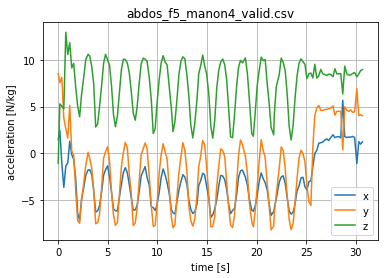

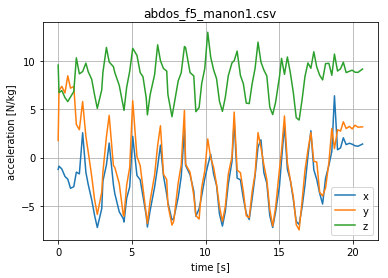

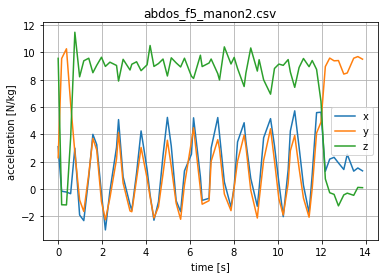

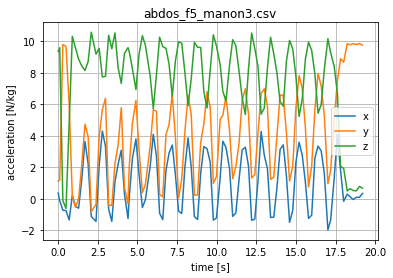

In [141]:
for f in data_abdos:
    data[f].plot(x="timestamp", y=['x', 'y', 'z'], kind='line', title=f, grid=True)
    pl.ylabel('acceleration [N/kg]')
    pl.xlabel('time [s]')

### Slices generation and features computation
Not used yet

In [61]:
storage_abdos = slice_generation(data_abdos)

In [112]:
df_abdos_features = compute_features(storage_abdos)

In [127]:
df_idle = df_abdos_features[df_abdos_features['type']==0]
mean_features_idle = []
for column in df_idle:
    mean_features_idle.append(np.mean(df_idle[column]))
    
df_workout = df_abdos_features[df_abdos_features['type']==1]
mean_features_workout = []
for column in df_idle:
    mean_features_workout.append(np.mean(df_workout[column]))

pd.DataFrame(data = [mean_features_idle, mean_features_workout], columns = df_abdos_features.columns)

,serie,slice,std error,std deviation,variance,range,type
0,2.000000,0.000000,0.531875,1.595624,2.667594,5.496000,0.0
1,1.567568,13.504505,0.816880,2.450641,6.807611,7.465586,1.0


###